In [1]:
#Import Dependencies
import pandas as pd
from os import path
from pathlib import Path
import csv
import matplotlib.pyplot as plt

In [2]:
#Paths for datasets
coexistence_path = 'Resources/Arctic and red fox coexistence at the edge of Arctic.csv'
bylot_reference_path = 'Resources/Arctic fox Bylot - Accelerometry-reference-data.csv'
herschel_arctic_reference_path = 'Resources/Arctic fox Herschel - Argos tracking-reference-data.csv'
herschel_arctic_tracking_path= 'Resources/Arctic fox Herschel - Argos tracking.csv'

<h3>Establishing paths and converting CSVs into Dataframes</h3>

In [3]:
#Reading the csv file and converting it into a df
coexist_df = pd.DataFrame(pd.read_csv(coexistence_path))

bylot_refer_df = pd.DataFrame(pd.read_csv(bylot_reference_path))

herschel_artic_refer_df = pd.DataFrame(pd.read_csv(herschel_arctic_reference_path))

herschel_arctic_track_df = pd.DataFrame(pd.read_csv(herschel_arctic_tracking_path))

<h3>Coexist Dataframe Clean up for ML</h3>

In [4]:
#View first 5 rows of the table
coexist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12840 entries, 0 to 12839
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         12840 non-null  int64  
 1   visible                          12840 non-null  bool   
 2   timestamp                        12840 non-null  object 
 3   location-long                    12840 non-null  float64
 4   location-lat                     12840 non-null  float64
 5   gps:fix-type                     12840 non-null  int64  
 6   gps:fix-type-raw                 12840 non-null  object 
 7   gps:hdop                         12840 non-null  float64
 8   gps:satellite-count              12840 non-null  int64  
 9   sensor-type                      12840 non-null  object 
 10  individual-taxon-canonical-name  12840 non-null  object 
 11  tag-local-identifier             12840 non-null  object 
 12  individual-local-i

In [26]:
#Create a new dataframe from previous df
coexist_mod_df = coexist_df[['tag-local-identifier',
                             'location-long',
                             'location-lat',
                             'individual-taxon-canonical-name',
                             'gps:satellite-count',
                             'individual-local-identifier']]

#Rename of columns
coexist_mod_df = coexist_mod_df.rename(columns={
    'tag-local-identifier': 'Tag ID',
    'location-long': 'Longitude',
    'location-lat': 'Latitude',
    'individual-taxon-canonical-name': 'Scientific Name'
})

#Drop rows with missing data
coexist_mod_df = coexist_mod_df.dropna()

#View first 5 rows of table
coexist_mod_df.head()

,Tag ID,Longitude,Latitude,Scientific Name,gps:satellite-count,individual-local-identifier
0,F695853,-92.772104,57.903385,Vulpes vulpes,8,AB
1,F695853,-92.772006,57.903328,Vulpes vulpes,10,AB
2,F695853,-92.771983,57.903330,Vulpes vulpes,6,AB
3,F695853,-92.771996,57.903303,Vulpes vulpes,10,AB
4,F695853,-92.771981,57.903367,Vulpes vulpes,9,AB


In [27]:
#View DF informaiton
coexist_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12840 entries, 0 to 12839
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tag ID                       12840 non-null  object 
 1   Longitude                    12840 non-null  float64
 2   Latitude                     12840 non-null  float64
 3   Scientific Name              12840 non-null  object 
 4   gps:satellite-count          12840 non-null  int64  
 5   individual-local-identifier  12840 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 602.0+ KB


In [34]:
#View how many foxes were tagged in the study
#Save tag ids into new list
tag_id = coexist_mod_df['Tag ID'].unique().tolist()
tag_id

['F695853',
 'F701533',
 'F701536',
 'F701542',
 '2M701573',
 'M695496',
 'M701529',
 '1M701573',
 'M701535',
 'F701532',
 'M695476',
 'M701574',
 'M695855',
 'M701531',
 'F701540',
 'F701544',
 'M694011',
 'F701543']

In [36]:
#Determine the two types of foxes in the study
#Save fox id into new list
fox_id = coexist_mod_df['Scientific Name'].unique().tolist()
fox_id

['Vulpes vulpes', 'Vulpes lagopus']

In [9]:
coexist_mod_df.to_csv('/Users/leslieleiva/Documents/GitHub/Arctic_Fox_Migration/Coexist_clean.csv')

<h3>Create a DF for every fox tagged to better map individual fox activity </h3>

In [39]:
#Function that removes space in string
def remove(string):
    return string.replace(" ", "")

#Create dict list to store df
tag_id_dict = {}

for tag in tag_id:
    #Find the rows that contain the uniwue tag id
    temp_df = coexist_mod_df[coexist_mod_df['Tag ID'] == tag]

    #Create a DF named after the county
    tag_id_dict["df_{}".format(tag)] = temp_df
    
    #Formatting id of newly created df
    df_new = "df_{}".format(tag)

    #Remove spaces in name (if any)
    df_new = remove(df_new)

    #Create a df named after the tag ID
    df = pd.DataFrame.from_dict(temp_df)
    locals()[df_new] = df
    print("DataFrame: " + df_new)

DataFrame: df_F695853
DataFrame: df_F701533
DataFrame: df_F701536
DataFrame: df_F701542
DataFrame: df_2M701573
DataFrame: df_M695496
DataFrame: df_M701529
DataFrame: df_1M701573
DataFrame: df_M701535
DataFrame: df_F701532
DataFrame: df_M695476
DataFrame: df_M701574
DataFrame: df_M695855
DataFrame: df_M701531
DataFrame: df_F701540
DataFrame: df_F701544
DataFrame: df_M694011
DataFrame: df_F701543


<h3>Mapping out artic fox GPS locations</h3>

https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

/var/folders/m_/c3cfft1d34jg2yvx6z3cv29h0000gn/T/ipykernel_13032/1860706687.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



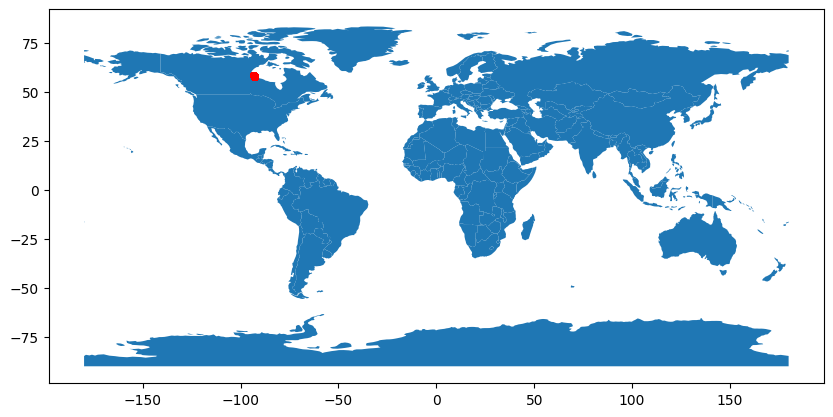

In [28]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(coexist_mod_df['Longitude'], coexist_mod_df['Latitude'])]
gdf = GeoDataFrame(coexist_mod_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

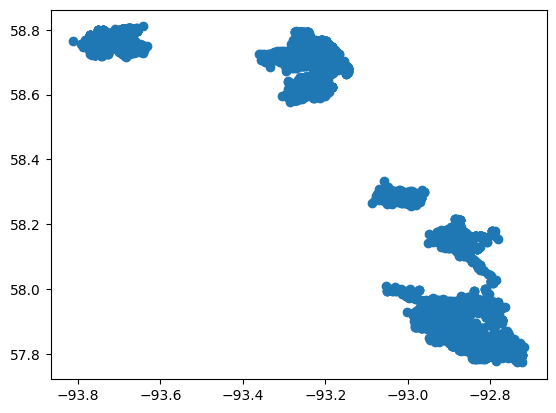

In [29]:
#Basic plotting utilizing longitude and latitude information
import matplotlib.pyplot as plt
plt.scatter(x=coexist_mod_df['Longitude'], y=coexist_mod_df['Latitude'])
plt.show()

In [30]:
import plotly.express as px
import pandas as pd

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(coexist_mod_df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Tag ID", 
                        hover_data=["Scientific Name", "Tag ID"],
                        color="Scientific Name",
                      #  color_continuous_scale=color_scale,
                      #  size="individual-taxon-canonical-name",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Bar(
    x=df[cat],
    y=df[num],
    name=num,
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Scatter(
    x=df[cat],
    y=df['cumulative_perc'],
    name='Cumulative Percentage',
    yaxis='y2'

)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = title,xaxis=dict(
      tickangle=-90
    ))
iplot(fig)


<h3>Bylot Dataframe Clean up for ML [In Progress] </h3>

In [13]:
bylot_refer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tag-id                   63 non-null     int64 
 1   animal-id                63 non-null     object
 2   animal-taxon             63 non-null     object
 3   deploy-on-date           63 non-null     object
 4   deploy-off-date          13 non-null     object
 5   animal-comments          1 non-null      object
 6   animal-life-stage        63 non-null     object
 7   animal-sex               63 non-null     object
 8   deployment-comments      5 non-null      object
 9   deployment-end-comments  8 non-null      object
 10  tag-manufacturer-name    63 non-null     object
 11  tag-model                63 non-null     object
dtypes: int64(1), object(11)
memory usage: 6.0+ KB


In [14]:
herschel_artic_refer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   tag-id                         2 non-null      int64 
 1   animal-id                      2 non-null      object
 2   animal-taxon                   2 non-null      object
 3   deploy-on-date                 2 non-null      object
 4   deploy-off-date                2 non-null      object
 5   animal-comments                2 non-null      object
 6   animal-life-stage              2 non-null      object
 7   animal-reproductive-condition  2 non-null      object
 8   animal-sex                     2 non-null      object
 9   attachment-type                2 non-null      object
 10  deployment-end-comments        2 non-null      object
 11  deployment-end-type            1 non-null      object
 12  deployment-id                  2 non-null      object
 13  duty-cycl

In [15]:
herschel_arctic_track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         327 non-null    int64  
 1   visible                          327 non-null    bool   
 2   timestamp                        327 non-null    object 
 3   location-long                    327 non-null    float64
 4   location-lat                     327 non-null    float64
 5   algorithm-marked-outlier         0 non-null      float64
 6   argos:altitude                   327 non-null    float64
 7   argos:best-level                 327 non-null    float64
 8   argos:calcul-freq                327 non-null    float64
 9   argos:error-radius               327 non-null    float64
 10  argos:gdop                       327 non-null    int64  
 11  argos:iq                         327 non-null    int64  
 12  argos:lat1            